In [1]:
import numpy as np
import pandas as pd

## Apply the Random Forest algorithm to predict the `TARGET_B`. Please note that this column suffers from class imbalance. Fix the class imbalance using upsampling.

In [2]:
num = pd.read_csv('files_for_lab/numerical.csv')
cat = pd.read_csv('files_for_lab/categorical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [3]:
num.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [4]:
cat.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [5]:
target.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


### checking missing values

In [6]:
num.isna().sum()

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

In [7]:
cat.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

In [8]:
target.isna().sum()

TARGET_B    0
TARGET_D    0
dtype: int64

### checking class imbalance

In [9]:
X = pd.concat([num,cat], axis=1)
y = target[['TARGET_B']]
print(X.shape), print(y.shape)

(95412, 337)
(95412, 1)


(None, None)

In [10]:
y.value_counts()

TARGET_B
0           90569
1            4843
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X, y)

In [12]:
y_over.value_counts()

TARGET_B
0           90569
1           90569
Name: count, dtype: int64

In [13]:
y = y_over
X = X_over

### X y Split

In [14]:
X_cat = X.select_dtypes(object)
levels = [ list(X[col].unique()) for col in X_cat.columns ]
levels

[['IL', 'CA', 'NC', 'FL', 'other', 'IN', 'MI', 'MO', 'TX', 'WA', 'WI', 'GA'],
 ['H', 'U'],
 ['F', 'M', 'other'],
 ['L'],
 ['E', 'G', 'F', 'D'],
 ['C', 'A', 'D', 'B'],
 ['T', 'S', 'R', 'U', 'C']]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)

encoder = OneHotEncoder(drop='first', categories=levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train = pd.concat([X_train_num, X_train_cat_encoded_df], axis = 1)
X_test  = pd.concat([X_test_num, X_test_cat_encoded_df], axis = 1)


In [19]:
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score, precision_score, recall_score

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


clf = RandomForestClassifier()

clf.fit(X_train, y_train)


C:\Users\schue\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

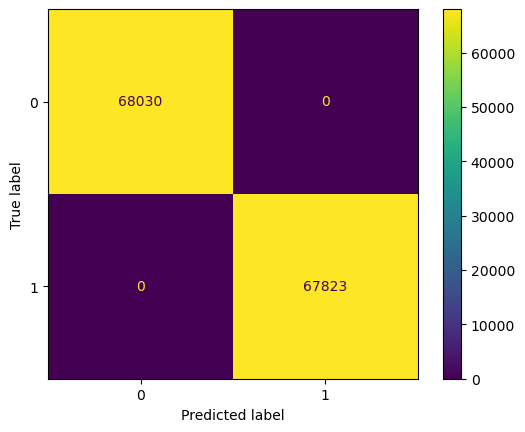

In [17]:
y_train_pred = clf.predict(X_train)
cm_test = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [20]:
print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Precision for the Random Forest in the TRAIN  set is {:.2f}".format(precision_score(y_train,y_train_pred)))
print("The Kappa for the Random Forest in the TRAIN  set is {:.2f}".format(cohen_kappa_score(y_train, y_train_pred)))

The Accuracy for the Random Forest in the TRAIN set is 1.00
The Precision for the Random Forest in the TRAIN  set is 1.00
The Kappa for the Random Forest in the TRAIN  set is 1.00


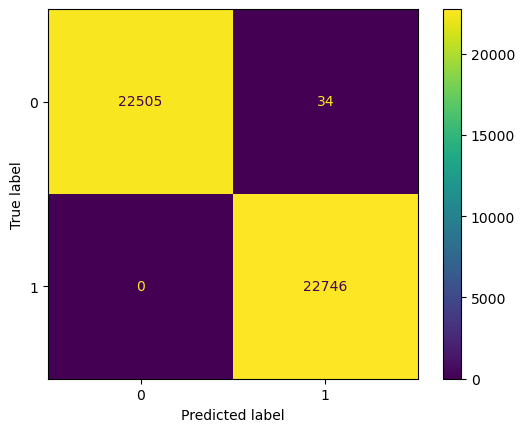

In [21]:
y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [22]:
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))
print("The Precision for the Random Forest in the TEST  set is {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The Kappa for the Random Forest in the TRAIN  set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred)))

The Accuracy for the Random Forest in the TEST  set is 1.00
The Precision for the Random Forest in the TEST  set is 1.00
The Kappa for the Random Forest in the TRAIN  set is 1.00


## Discuss the model predictions and it's impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How much the money the company will not earn because of missclassifications made by the model?

The model without any parameters suffers highly from overfitting. The error metrics look not realistic in the test and in the train set.

Target B is wheater or not the customer is donating. 0=No 1= Yes. So its better to predict that the customer is not donating but because the prdiction is false he is actually donate then to predict he is donationg but in the end he is not. 

Our positive label will be "Yes=1". And we want to minimize the FalsePositives, so the Precision is the error metric I will look at.

## Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one?  Please checkout
[make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer) alongside with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to train the model to maximize the error metric of interest in this case.

In [23]:
from sklearn.metrics import make_scorer
precision = precision_score(y_test, y_test_pred)
#recall = recall_score(y_test, y_test_pred)
scorer_pres = make_scorer(precision_score)
#scorer_rec = make_scorer(recall_score)

In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [0, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    }

In [34]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer_pres, return_train_score=True, n_jobs=-1, verbose=20)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\schue\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\schue\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\schue\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\schue\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\schue\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [0, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring=make_scorer(precision_score),
             verbose=20)

In [36]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [38]:
'''
{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}
'''

"\n{'max_depth': 10,\n 'min_samples_leaf': 1,\n 'min_samples_split': 5,\n 'n_estimators': 200}\n"

In [24]:
clf = RandomForestClassifier(max_depth= 10,
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 200)

clf.fit(X_train, y_train)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

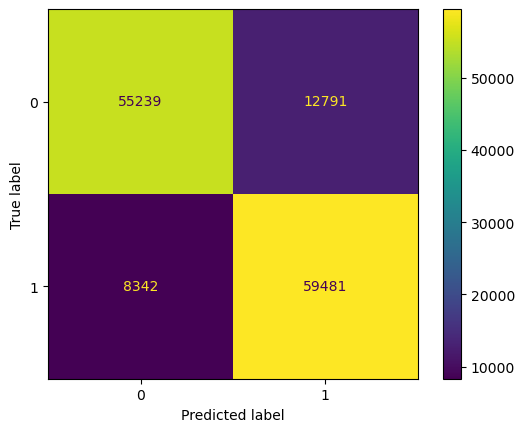

In [25]:
y_train_pred = clf.predict(X_train)
cm_test = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [26]:
print("The Accuracy for the Random Forest in the TRAIN  set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Precision for the Random Forest in the TRAIN  set is {:.2f}".format(precision_score(y_train,y_train_pred)))
print("The Kappa for the Random Forest in the TRAIN  set is {:.2f}".format(cohen_kappa_score(y_train, y_train_pred)))

The Accuracy for the Random Forest in the TRAIN  set is 0.84
The Precision for the Random Forest in the TRAIN  set is 0.82
The Kappa for the Random Forest in the TRAIN  set is 0.69


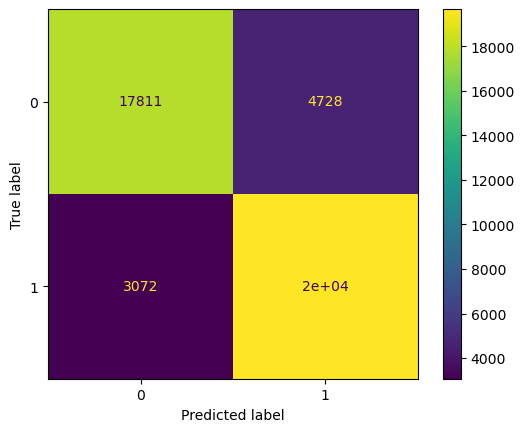

In [27]:
y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [28]:
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))
print("The Precision for the Random Forest in the TEST  set is {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The Kappa for the Random Forest in the TRAIN  set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred)))

The Accuracy for the Random Forest in the TEST  set is 0.83
The Precision for the Random Forest in the TEST  set is 0.81
The Kappa for the Random Forest in the TRAIN  set is 0.66


The error scores after the grid search are more realistic. They also look quite similar in the test and train set. So I can say that they are not suffering from overfitting.